<a href="https://colab.research.google.com/github/Kirushikesh/Driver_Drowsiness_Detection/blob/main/DrowsinessModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the Problem**

We need to predict whether the human eye was open or not. The problem can be modified as a Supervised Learning Problem. Since the target column is discrete the problem can be further classified as Classification problem.

**Understanding the Dataset**

MRL Eye Dataset the large-scale dataset of 80k human eye images. This dataset contains infrared images in low and high resolution, all captured in various lightning conditions and by different devices. With equal proportion of Open and Closed eyes. Each image is represented by 52x52 pixels. 

**Importing Required Libraries :**

In [35]:
import tensorflow as tf
import numpy as np
from PIL import Image,ImageOps 
import os
import pandas as pd
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn import model_selection
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

**Importing the Dataset**

In [2]:
!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip

--2021-05-13 06:49:12--  http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
Resolving mrl.cs.vsb.cz (mrl.cs.vsb.cz)... 158.196.141.22
Connecting to mrl.cs.vsb.cz (mrl.cs.vsb.cz)|158.196.141.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341866898 (326M) [application/zip]
Saving to: ‘mrlEyes_2018_01.zip’

mrlEyes_2018_01.zip 100%[===================>] 326.03M  11.0MB/s    in 39s     

2021-05-13 06:49:52 (8.30 MB/s) - ‘mrlEyes_2018_01.zip’ saved [341866898/341866898]



In [3]:
!unzip mrlEyes_2018_01 && rm mrlEyes_2018_01.zip
!mkdir /content/data
for i in os.listdir('mrlEyes_2018_01'):
  if(i[:2]=='s0'):
    minifolder='/content/mrlEyes_2018_01/'+i
    os.chdir(minifolder)
    filename='/content/data/'+i+'.zip'
    !zip -m '$filename' *

Streaming output truncated to the last 5000 lines.
  adding: s0032_04000_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04001_0_0_1_1_1_02.png (stored 0%)
  adding: s0032_04002_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04003_0_0_1_1_1_02.png (stored 0%)
  adding: s0032_04004_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04005_0_0_1_1_1_02.png (deflated 0%)
  adding: s0032_04006_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04007_0_0_1_1_1_02.png (deflated 0%)
  adding: s0032_04008_0_0_1_1_0_02.png (deflated 1%)
  adding: s0032_04009_0_0_1_1_1_02.png (stored 0%)
  adding: s0032_04010_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04011_0_0_1_0_0_02.png (stored 0%)
  adding: s0032_04012_0_0_1_1_1_02.png (deflated 0%)
  adding: s0032_04013_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04014_0_0_1_1_1_02.png (stored 0%)
  adding: s0032_04015_0_0_1_1_0_02.png (deflated 0%)
  adding: s0032_04016_0_0_1_1_1_02.png (deflated 0%)
  adding: s0032_04017_0_0_1_1_1_02.png (deflated 1%)
  add

In [4]:
os.chdir('/content/data')
!cat s0* > eyes_temp.zip
!zip -FF eyes_temp.zip --out data.zip

!rm s0*

!unzip data.zip && rm data.zip
!rm eyes_temp.zip

Streaming output truncated to the last 5000 lines.
 extracting: s0037_05258_1_1_0_0_1_01.png  
 extracting: s0037_05259_1_1_0_0_0_01.png  
 extracting: s0037_05260_1_1_0_0_0_01.png  
 extracting: s0037_05261_1_1_0_0_0_01.png  
 extracting: s0037_05262_1_1_0_0_1_01.png  
 extracting: s0037_05263_1_1_0_0_1_01.png  
 extracting: s0037_05264_1_1_0_0_0_01.png  
 extracting: s0037_05265_1_1_0_0_1_01.png  
 extracting: s0037_05266_1_1_0_0_0_01.png  
 extracting: s0037_05267_1_1_0_0_0_01.png  
 extracting: s0037_05268_1_1_0_0_0_01.png  
 extracting: s0037_05269_1_1_0_0_0_01.png  
 extracting: s0037_05270_1_1_0_0_0_01.png  
 extracting: s0037_05271_1_1_0_0_0_01.png  
 extracting: s0037_05272_1_1_0_0_0_01.png  
 extracting: s0037_05273_1_1_0_0_0_01.png  
 extracting: s0037_05274_1_1_0_0_0_01.png  
 extracting: s0037_05275_1_1_0_0_0_01.png  
 extracting: s0037_05276_1_1_0_0_0_01.png  
 extracting: s0037_05277_1_1_0_2_1_01.png  
 extracting: s0037_05278_1_1_0_0_0_01.png  
 extracting: s0037_05279_

In [5]:
os.listdir('/content/data')[:10]

['s0025_00693_0_0_1_0_1_01.png',
 's0037_06922_1_0_1_0_0_01.png',
 's0036_05098_1_1_1_2_0_01.png',
 's0015_00193_0_0_0_0_1_01.png',
 's0037_08944_1_1_1_0_0_01.png',
 's0015_00855_0_0_1_0_1_01.png',
 's0012_03951_0_1_0_0_0_01.png',
 's0037_08025_1_0_1_0_0_01.png',
 's0012_01326_0_0_0_2_1_03.png',
 's0025_00798_0_0_1_0_1_01.png']

In [6]:
data=[]
label=[]
for i in os.listdir('/content/data'):
  image = Image.open(i)
  image=ImageOps.grayscale(image)
  image=image.resize((52,52))
  image=np.array(image)
  data.append(image)
  if(i[16]=='1'):
    label.append(1)
  else:
    label.append(0)

**Data Analysis**

In [7]:
len(data),len(label)

(84898, 84898)

In [11]:
df=pd.DataFrame(label,columns=['target'])
Close = df[df['target']==0]['target'].count()
Open = df[df['target']==1]['target'].count()
Open_percent = Open/(Open+Close)
Close_percent = Close/(Close+Open)
print('Total Number of Open Eyes:',Open)
print('Total Number of Close Eyes:',Close)
print('Percentage of Open Eyes:',Open_percent*100,'%')
print('Percentage of Close Eyes:',Close_percent*100,'%')

Total Number of Open Eyes: 42952
Total Number of Close Eyes: 41946
Percentage of Open Eyes: 50.592475676694384 %
Percentage of Close Eyes: 49.407524323305616 %


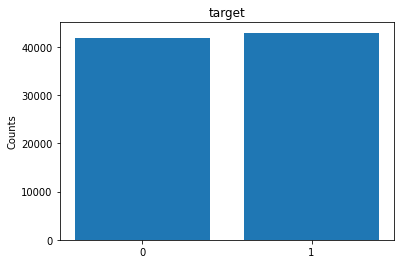

In [12]:
var = df['target']
count = var.value_counts()
plt.bar(count.index, count)
plt.xticks(count.index, count.index.values)
plt.ylabel("Counts")
plt.title('target')
plt.show()

**Data Visualisation**

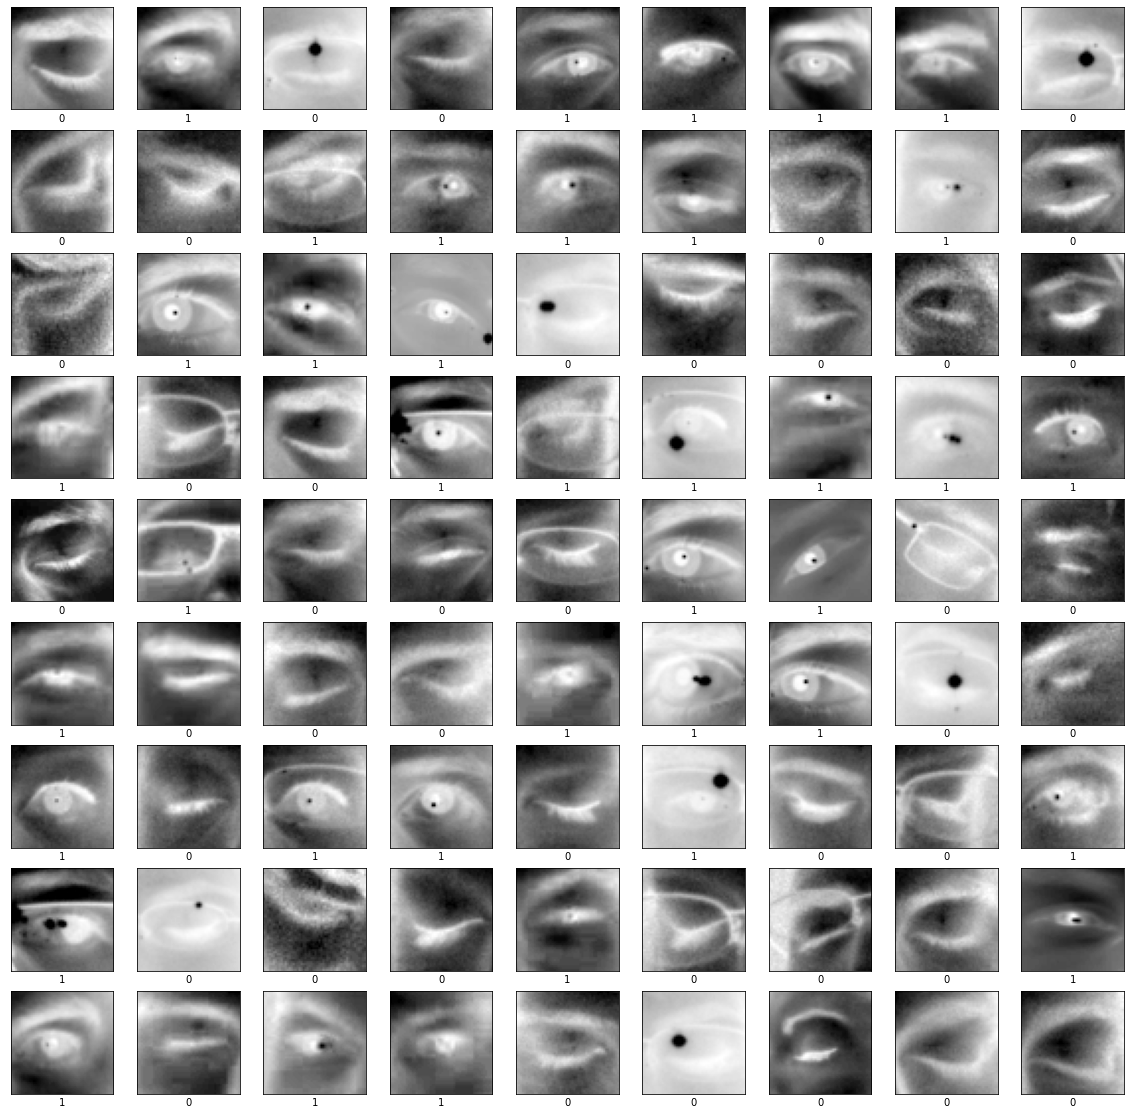

In [17]:
plt.figure(figsize=(20,20))
for i in range(81):
    plt.subplot(9,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i+50],cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(label[i+50])
plt.show()

**Data Preprocessing**

In [18]:
data=np.array(data)
label=to_categorical(label)
print(data[0])
print(data.shape)
print(label.shape)

[[ 75  74  73 ... 113 113 112]
 [ 75  74  72 ... 111 111 111]
 [ 73  72  72 ... 109 109 110]
 ...
 [ 86  89  89 ...  90  91  94]
 [ 86  89  90 ...  88  91  94]
 [ 87  89  90 ...  89  91  95]]
(84898, 52, 52)
(84898, 2)


In [19]:
data=data/255.0

**Building Model**

In [20]:
train_images,test_images,train_labels,test_labels=model_selection.train_test_split(data,label,test_size=0.33,random_state=42)

In [21]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(56881, 52, 52)
(56881, 2)
(28017, 52, 52)
(28017, 2)


In [22]:
train_images=train_images.reshape(list(train_images.shape) + [1])
test_images=test_images.reshape(list(test_images.shape)+[1])
print(train_images.shape)
print(test_images.shape)

(56881, 52, 52, 1)
(28017, 52, 52, 1)


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(52,52,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

In [26]:
history = model.fit(train_images, train_labels, epochs=15,batch_size=128,validation_data = (test_images,test_labels))

Epoch 1/15
445/445 [==============================] - 41s 18ms/step - loss: 0.3314 - accuracy: 0.8538 - val_loss: 0.1007 - val_accuracy: 0.9634
Epoch 2/15
445/445 [==============================] - 7s 16ms/step - loss: 0.1025 - accuracy: 0.9637 - val_loss: 0.0659 - val_accuracy: 0.9770
Epoch 3/15
445/445 [==============================] - 7s 16ms/step - loss: 0.0729 - accuracy: 0.9739 - val_loss: 0.0570 - val_accuracy: 0.9807
Epoch 4/15
445/445 [==============================] - 7s 16ms/step - loss: 0.0582 - accuracy: 0.9793 - val_loss: 0.0560 - val_accuracy: 0.9806
Epoch 5/15
445/445 [==============================] - 7s 16ms/step - loss: 0.0517 - accuracy: 0.9819 - val_loss: 0.0472 - val_accuracy: 0.9842
Epoch 6/15
445/445 [==============================] - 7s 16ms/step - loss: 0.0496 - accuracy: 0.9813 - val_loss: 0.0453 - val_accuracy: 0.9849
Epoch 7/15
445/445 [==============================] - 7s 16ms/step - loss: 0.0428 - accuracy: 0.9853 - val_loss: 0.0462 - val_accuracy: 0.984

**Model Evaluation**

In [27]:
model.evaluate(test_images,test_labels,batch_size=64)

438/438 [==============================] - 2s 4ms/step - loss: 0.0337 - accuracy: 0.9889


[0.03366783633828163, 0.9888995885848999]

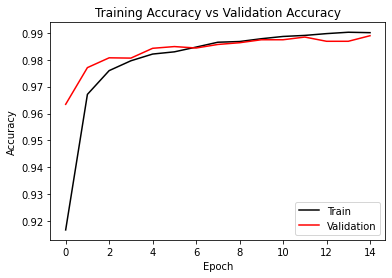

In [28]:
plt.plot(history.history['accuracy'], color='black',)
plt.plot(history.history['val_accuracy'], color='red',)
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

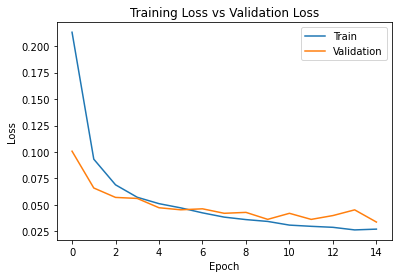

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [33]:
# Confusion Matrix

# Predict the values from the validation dataset
Y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = pd.DataFrame(confusion_mtx , index = [i for i in range(2)] , columns = [i for i in range(2)])

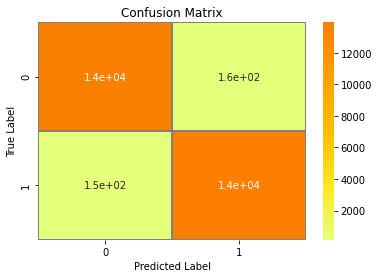

In [36]:
# plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, linewidths=1,cmap="Wistia",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Conclusion**

Our CNN Model can Able to Identify the Open and Closed Eyes with 98% Accuracy.

In [37]:
model.save('/content/model.h5', overwrite=True)